In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [23]:
df = pd.read_csv('../source_data/game_data_all.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [25]:
missing_data_in_columns = df.isna().any() #czy sa nany i gdzie
print(missing_data_in_columns)

Unnamed: 0               False
game                     False
link                     False
release                  False
peak_players             False
positive_reviews         False
negative_reviews         False
total_reviews            False
rating                   False
primary_genre             True
store_genres              True
publisher                 True
developer                 True
detected_technologies     True
store_asset_mod_time      True
review_percentage         True
players_right_now         True
24_hour_peak              True
all_time_peak            False
all_time_peak_date        True
dtype: bool


In [26]:
#właściwy kod na obliczenie wieku gry
df['release'] = pd.to_datetime(df['release'])
df['rok'] = df['release'].dt.year
df['game_age'] = 2024 - df['rok']
df.drop('rok', axis=1)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67566,67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),...,Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),...,Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01,18
67568,67568,Gumboy: Crazy Adventures,/app/2520/,2006-12-19,22,61,60,121,50.32,Unknown Genre (0),...,CINEMAX s.r.o.,CINEMAX s.r.o.,SDK.OpenAL; SDK.Vorbis,2022-11-04,50.0,0,1,22,2008-09-13,18
67569,67569,Shattered Union,/app/3960/,2006-10-25,13,71,70,141,50.27,Strategy (2),...,2K,PopTop,SDK.Bink_Video; SDK.Miles_Sound_System,2019-09-20,50.0,1,2,13,2020-03-15,18


In [27]:
df['game_age'].unique()

array([ 1,  8,  5, 11,  7,  4,  2,  3,  6,  9, 10, 15, 13, 14, 12, 17, 16,
       18])

In [28]:
df['primary_genre'].unique()

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Unknown Genre (0)',
       'Violent (73)', 'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)',
       'Game Development (60)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)',
       'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)',
       'Unknown Genre (21)'], dtype=object)

In [29]:
category_to_drop = ['Free to Play (37)', 'Early Access (70)', 'Unknown Genre (0)', 'Game Development (60)', 'Utilities (57)', 
                    'Audio Production (52)', 'Video Production (58)', 'Web Publishing (59)', 'Unknown Genre (34)', 'Unknown Genre (33)', 
                    'Unknown Genre (6)', 'Unknown Genre (21)']
rows_to_drop = df[df['primary_genre'].isin(category_to_drop)].index
df.drop(rows_to_drop, inplace=True)

In [30]:
category = df['primary_genre'].unique()
category

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Simulation (28)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Violent (73)',
       'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)'],
      dtype=object)

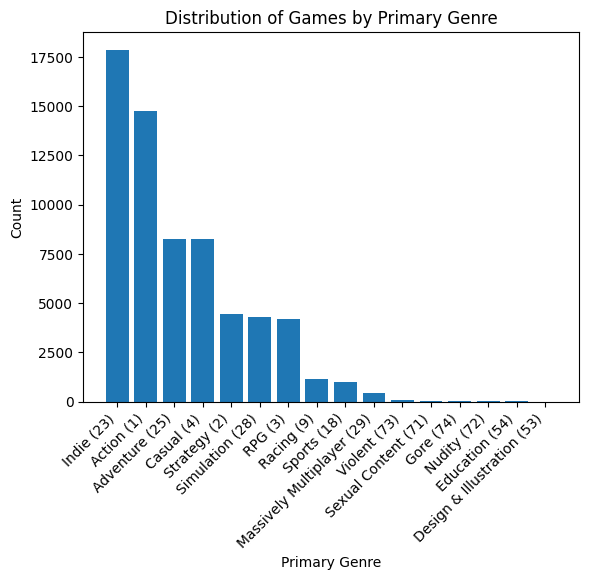

In [31]:
genre_counts = df['primary_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts)
plt.xlabel("Primary Genre")
plt.ylabel("Count")
plt.title('Distribution of Games by Primary Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
#Usunięcie niepotrzebnych kolumn
columns_to_drop = ['peak_players', 'store_genres', 'detected_technologies']
df.drop(columns=columns_to_drop)
df

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,2023,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,2023,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,2023,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,2023,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67564,67564,Earth 2160,/app/1900/,2006-04-01,9960,878,375,1253,67.73,Strategy (2),...,Reality Pump Studios,Engine.FNA; Engine.XNA; SDK.OpenAL,2019-12-23,70.0,13,17,9960,2018-04-12,2006,18
67565,67565,RoboBlitz,/app/4300/,2006-11-07,7,57,20,77,67.55,Action (1),...,Naked Sky Entertainment,Engine.Unreal; SDK.OpenAL; SDK.Vorbis,NaN,75.0,0,1,7,2014-04-27,2006,18
67566,67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),...,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01,2006,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),...,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01,2006,18


In [33]:
#Grupowanie po wieku gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_wieku = df.groupby('game_age')[['total_reviews']].mean().reset_index()
srednia_wg_wieku

,game_age,total_reviews
0,1,347.995639
1,2,532.985480
2,3,723.106242
3,4,1193.555042
4,5,1031.545770
5,6,1163.390379
6,7,1151.749237
7,8,1981.492890
8,9,3622.061137
9,10,2554.140013


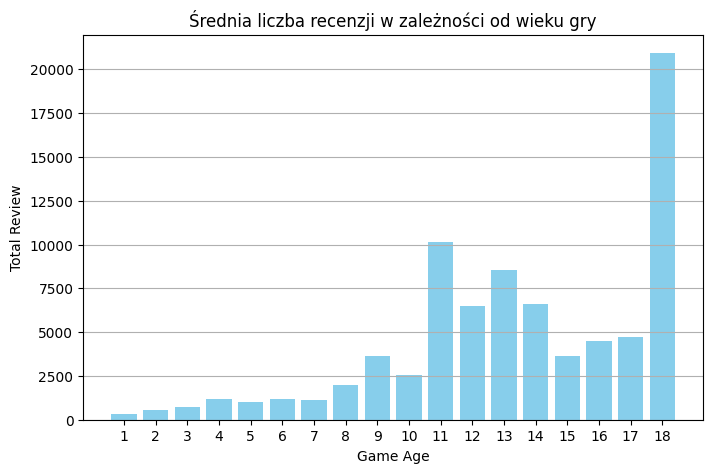

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(srednia_wg_wieku['game_age'], srednia_wg_wieku['total_reviews'], color='skyblue')
plt.xlabel('Game Age')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od wieku gry')
plt.xticks(srednia_wg_wieku['game_age'])
plt.grid(axis='y')
plt.show()

In [35]:
#Grupowanie po rodzaju gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_rodzaju = df.groupby('primary_genre')[['total_reviews']].mean().reset_index()
srednia_wg_rodzaju

,primary_genre,total_reviews
0,Action (1),2358.608640
1,Adventure (25),1103.341215
2,Casual (4),248.671850
3,Design & Illustration (53),373.750000
4,Education (54),15.444444
5,Gore (74),178.772727
6,Indie (23),676.668234
7,Massively Multiplayer (29),5135.008949
8,Nudity (72),68.833333
9,RPG (3),1584.757814


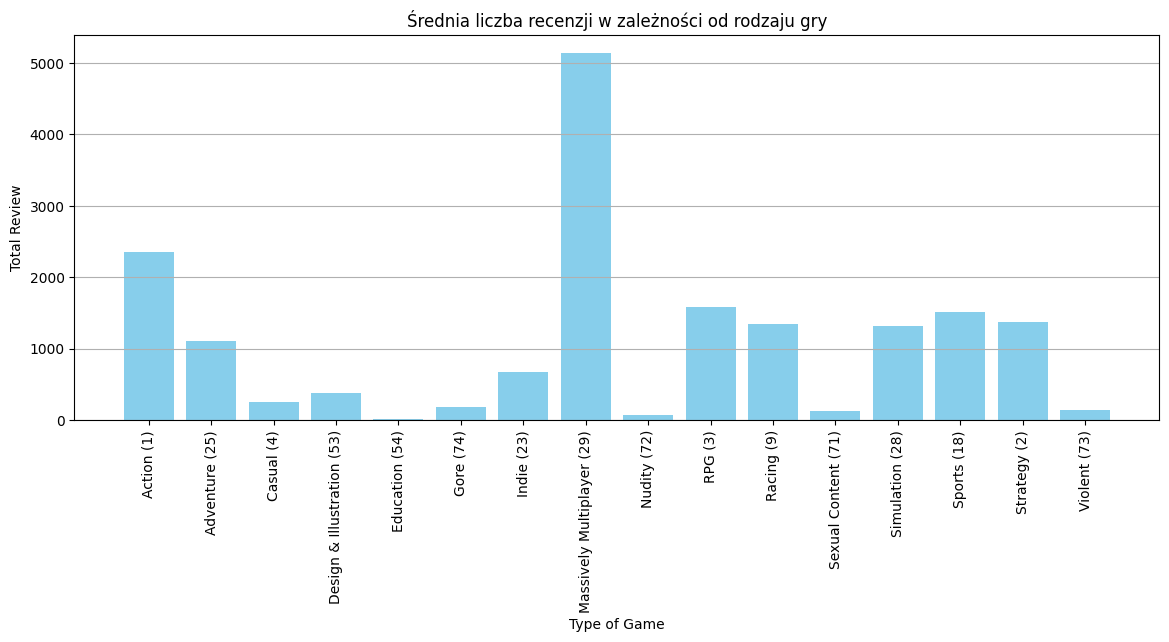

In [36]:
plt.figure(figsize=(14, 5))
plt.bar(srednia_wg_rodzaju['primary_genre'], srednia_wg_rodzaju['total_reviews'], color='skyblue')
plt.xlabel('Type of Game')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od rodzaju gry')
plt.xticks(srednia_wg_rodzaju['primary_genre'], rotation='vertical')
plt.grid(axis='y')
plt.show()

In [37]:
#Posortowanie bazy2 wg wieku gry i w tych grupach wg rodzaju. Obliczenie średniej total_reviews i uszeregowanie rodzajów od największej średniej.
posortowana_baza2 = df[df['total_reviews'] >10000].sort_values(by=['game_age', 'primary_genre'])
średnia_baza2 = posortowana_baza2.groupby(['game_age', 'primary_genre'])['total_reviews'].mean().reset_index()
posortowana_średnia = średnia_baza2.sort_values(by=['game_age', 'total_reviews'], ascending=[True, False])
posortowana_średnia

,game_age,primary_genre,total_reviews
1,1,Adventure (25),64783.500000
0,1,Action (1),44748.166667
3,1,Indie (23),25372.666667
4,1,RPG (3),20477.000000
6,1,Strategy (2),15084.000000
...,...,...,...
129,17,Strategy (2),14899.000000
131,18,Indie (23),945444.000000
133,18,Strategy (2),27515.000000
130,18,Action (1),19998.000000


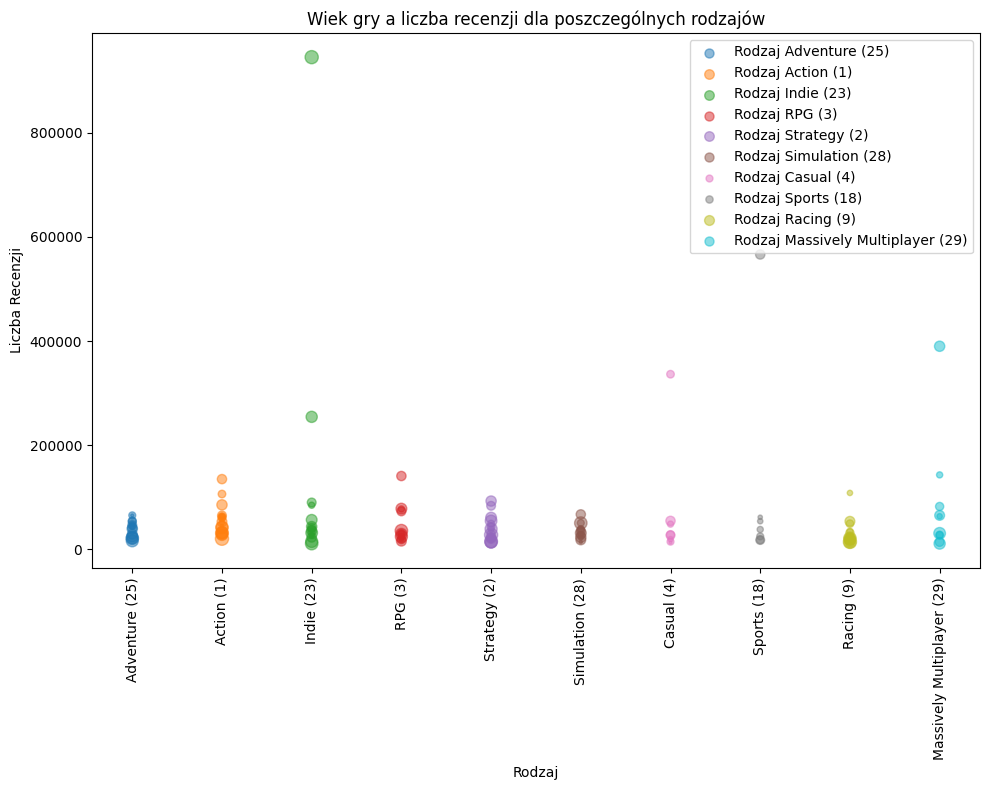

In [38]:
# W wykresie wielkość kropek jest proporcjonalne do wieku gry.
plt.figure(figsize=(10,8))
for rodzaj in posortowana_średnia['primary_genre'].unique():
    data = posortowana_średnia[posortowana_średnia['primary_genre'] == rodzaj]
    plt.scatter(data['primary_genre'], data['total_reviews'], s=data['game_age']*5, label=f'Rodzaj {rodzaj}', alpha=0.5)
plt.xlabel('Rodzaj')
plt.ylabel('Liczba Recenzji')
plt.title('Wiek gry a liczba recenzji dla poszczególnych rodzajów')
plt.xticks(rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

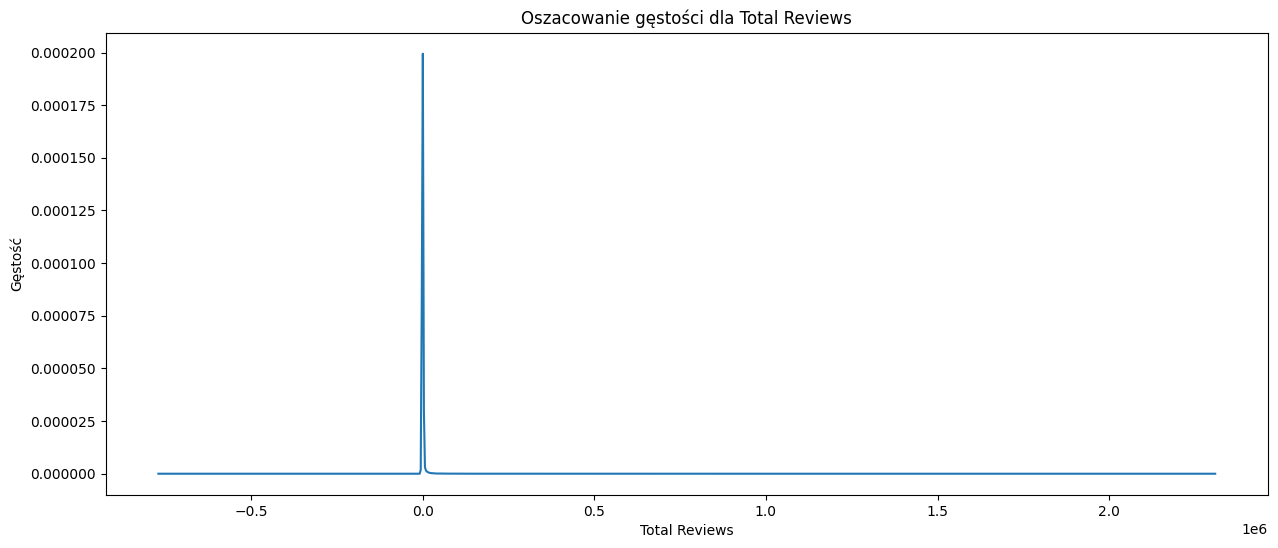

In [39]:
#Kernel Density Estimate
plt.figure(figsize=(15,6))
df['total_reviews'].plot(kind='kde')
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

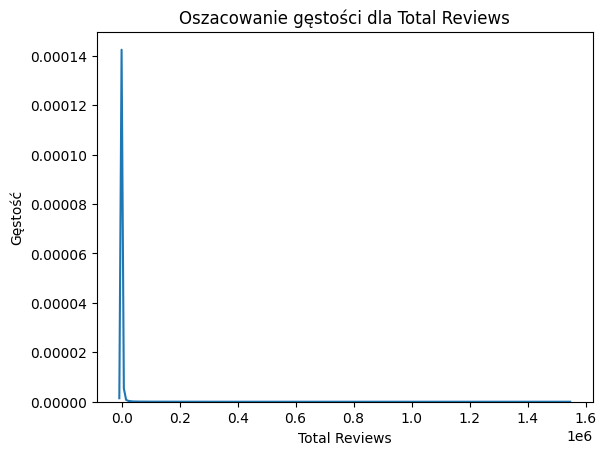

In [40]:
sns.kdeplot(df['total_reviews'], bw_adjust=1.5)
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

In [41]:
# #Statystyki opisowe dla total_reviews.
# df['total_reviews'].describe()

In [42]:
# column_indexes = df.columns #inny sposob na sprawdzenie indeksow
# print(column_indexes)

In [43]:
# column_position = df.columns.get_loc('Unnamed: 0') #przykładowo sprawdzamy pozycję danej kolumny
# column_position

In [44]:
# #Do wykorzystania po ustaleniu, które kolumny usuwamy


# pd.read_csv('sample.csv', skiprows=[0,2]) #-> pominiecie wierszy
# pd.read_csv('sample.csv', usecols=[0,1]) #-> wskazanie, ktore kolumny chcemy uzyc
# df = pd.read_csv('sample.csv', usecols=lambda column: column not in [1]) #wariacja do pomijania kolumn
# pd.read_csv('sample.csv', nrows=3) #-> ile wierszy chcemy wczytać, jesli plik jest duży
# pd.DataFrame.value_counts() - konkretne wartosci dyskretne

# columns_to_drop = ['B', 'D'] #usuwanie kolumn v.1
# df = df.drop(columns=columns_to_drop)

# column_to_skip = 'column' #usuwanie kolumn v.2
# df = df.drop(columns=[column_to_skip])